In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-bright','dark_background'])
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [4]:
data.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [6]:
data.dropna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,0,0.0,0,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,1,0.0,3,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,1,0.0,0,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,0,0.0,2,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [8]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [9]:
# seperating dependent and independent variables
X = data.drop(columns = ['churn','customer_id'])
Y = data['churn']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [11]:
# splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_x, Y, test_size = 0.80, stratify = Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4413, 19), (17654, 19), (4413,), (17654,))

# model building and predictions

In [12]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(class_weight = 'balanced')
classifier = DTC()

In [13]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_train)

In [14]:
predicted_values[:30]

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

# evaluating the model over the training set itself

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3558
           1       1.00      1.00      1.00       855

    accuracy                           1.00      4413
   macro avg       1.00      1.00      1.00      4413
weighted avg       1.00      1.00      1.00      4413



# testing in test set

In [16]:
predicted_values = classifier.predict(x_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     14235
           1       0.43      0.45      0.44      3419

    accuracy                           0.78     17654
   macro avg       0.65      0.65      0.65     17654
weighted avg       0.78      0.78      0.78     17654



# visualising decision tree

In [17]:
!pip install graphviz

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree = classifier, out_file = 'tree_viz',
               max_depth = None, feature_names = X.columns,
               label = None, impurity = False)

In [19]:
from graphviz import render
render(filepath = 'Pictures' , format = 'png', engine = 'neato' )

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# hyperparameter tuning

In [20]:
classifier = DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

# max depth

In [21]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
    
    model.fit(x1,y1)
    
    predict = model.predict(x1)
    f1 = f1_score(y1, predict)
    
    predict = model.predict(x2)
    f2 = f1_score(y2, predict)
    
    return f1,f2

In [22]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (5,5), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_score')
    plt.title(title)
    plt.legend()
    plt.xlabel('parameter value')
    plt.ylabel('f1 score')
    plt.show()

In [23]:
maxdepth = [i for i in range(1,50)]
train = []
test = []

for i in maxdepth:
    model = DTC(class_weight = 'balanced',max_depth = i,random_state = 42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

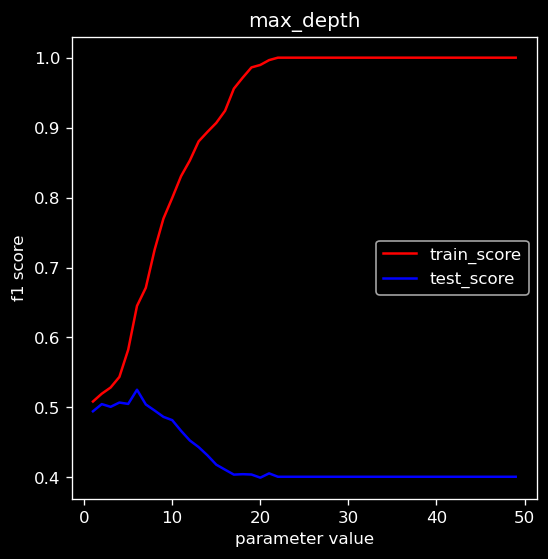

In [24]:
effect(train,test,range(1,50),'max_depth')

# min samples split 

In [25]:
min_samples = [i for i in range(2,5000,25)]
train = []
test = []

for i in min_samples:
    model = DTC(class_weight = 'balanced', min_samples_split = i,random_state = 42)
    f1,f2 = calc_score(model,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

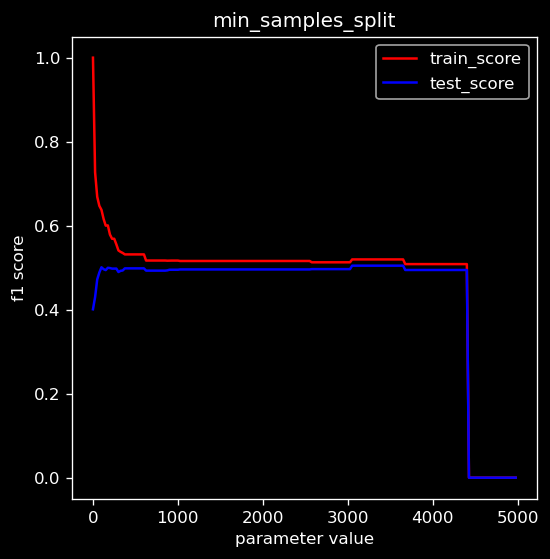

In [26]:
effect(train,test,range(2,5000,25),'min_samples_split')

# max leaf nodes 

In [27]:
maxleafnodes = [i for i in range(2,200,10)]
train = []
test = []

for i in maxleafnodes:
    model = DTC(class_weight = 'balanced', max_leaf_nodes = i,random_state = 42)
    f1,f2 = calc_score(model ,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

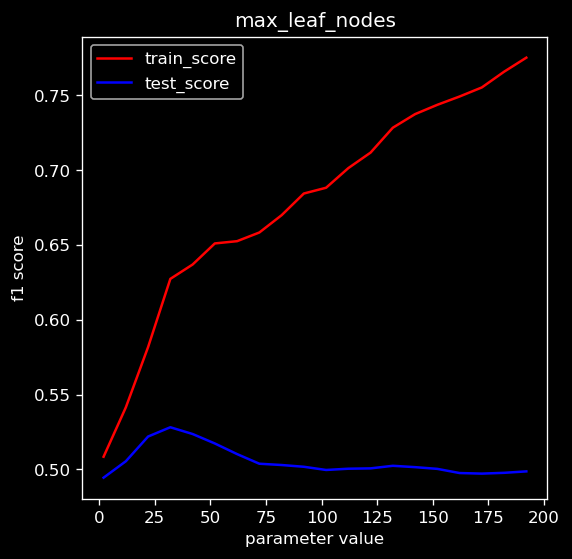

In [28]:
effect(train,test,range(2,200,10),'max_leaf_nodes')

# min sample leaf

In [32]:
minsamplesleaf = [i for i in range(2,4000,25)]
train = []
test = []

for i in minsamplesleaf:
    model = DTC(class_weight = 'balanced', min_samples_leaf = i,random_state = 42)
    f1,f2 = calc_score(model ,x_train,y_train,x_test,y_test)
    train.append(f1)
    test.append(f2)

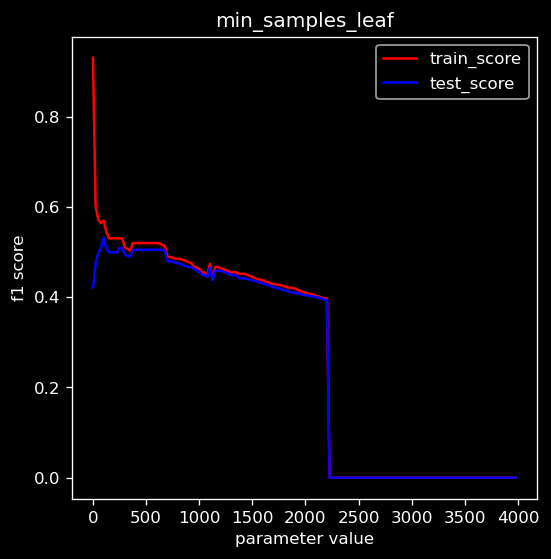

In [33]:
effect(train,test,range(2,4000,25),'min_samples_leaf')

In [34]:
model = DTC(max_depth = 9)
model.fit(x_train,y_train)
feature_imp = pd.Series(model.feature_importances_, index = X.columns)
k = feature_imp.sort_values()

Text(0.5, 1.0, 'feature importance')

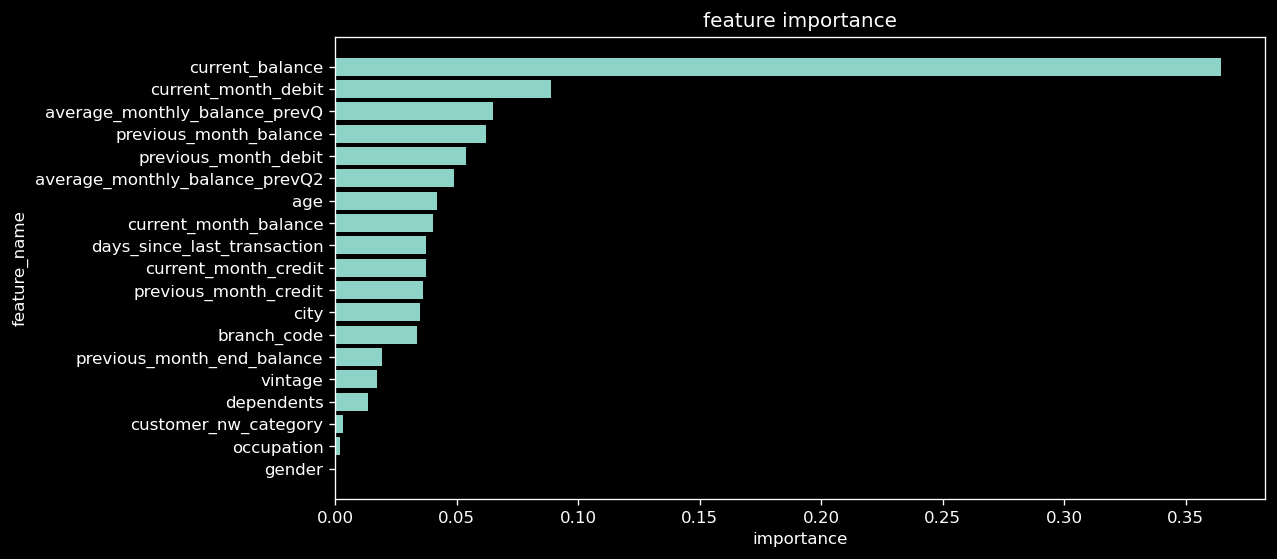

In [35]:
plt.figure(figsize = (10,5),dpi = 120)
plt.barh(k.index,k)
plt.xlabel('importance')
plt.ylabel('feature_name')
plt.title('feature importance')